## Hybridization in Wrens - N5NB

#### DESCRIPTIVE STATISTICS ####

In [3]:
rm(list=ls())

setwd("C:/Users/Owner/Desktop/Dropbox/Thesis/Molecular_Wrens/Wren_1/R")

In [4]:
install.packages("adegenet")
library(adegenet)

Installing package into 'C:/Users/Owner/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'adegenet' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'adegenet'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Owner\Documents\R\win-library\4.0\00LOCK\adegenet\libs\x64\adegenet.dll to C:\Users\Owner\Documents\R\win-library\4.0\adegenet\libs\x64\adegenet.dll: Permission denied"
Warning message:
"restored 'adegenet'"



The downloaded binary packages are in
	C:\Users\Owner\AppData\Local\Temp\RtmpIRtJ60\downloaded_packages


Loading required package: ade4

Registered S3 method overwritten by 'spdep':
  method   from
  plot.mst ape 


   /// adegenet 2.1.3 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()




Attaching package: 'adegenet'


The following object is masked from 'package:hierfstat':

    read.fstat




We can read directly the *STRUCTURE* file and converting it into a *genind* (the format for *adegenet*) with the following command.

In [6]:
# Reading and converting STRUCTURE file into genind
wren.n5nb.genind <- import2genind("populations2.str", onerowperind=FALSE, n.ind=112, n.loc=4409, col.lab=1, col.pop=2, ask=FALSE)


 Converting data from a STRUCTURE .stru file to a genind object... 



We need to prepare the data. Reading the file with the order of samples as it was enter in *STACK* and the file with the location of collection (populations).

In [7]:
# Read the pop file with different designation of populations
indtable <- read.table("wren_pop.txt", col.names = c("Ind", "Pop3", "Pop4", "Pop6", "Pop"))[-c(1),]

# Read the pop file used in the denovo assembly in Stacks 
# I need this to get the order of samples
stack.ord <- read.table("popmap_wren_n5nb_sh11.txt", col.names = c("Ind", "ord"))

# Adding a column for the order of samples
stack.ord$ord <- 1:nrow(stack.ord)

# Merging the pop and the order files
pop.lab <- merge(indtable, stack.ord, by="Ind")[,c(1,3,5,6)]

# Ordering the labels as in the genind file
pop.lab <- pop.lab[order(pop.lab$ord, decreasing = FALSE),]

# Setting up the populations in the genind data
strata(wren.n5nb.genind) <- pop.lab
setPop(wren.n5nb.genind) <- ~Pop

Visualizing the number of samples per location (population)

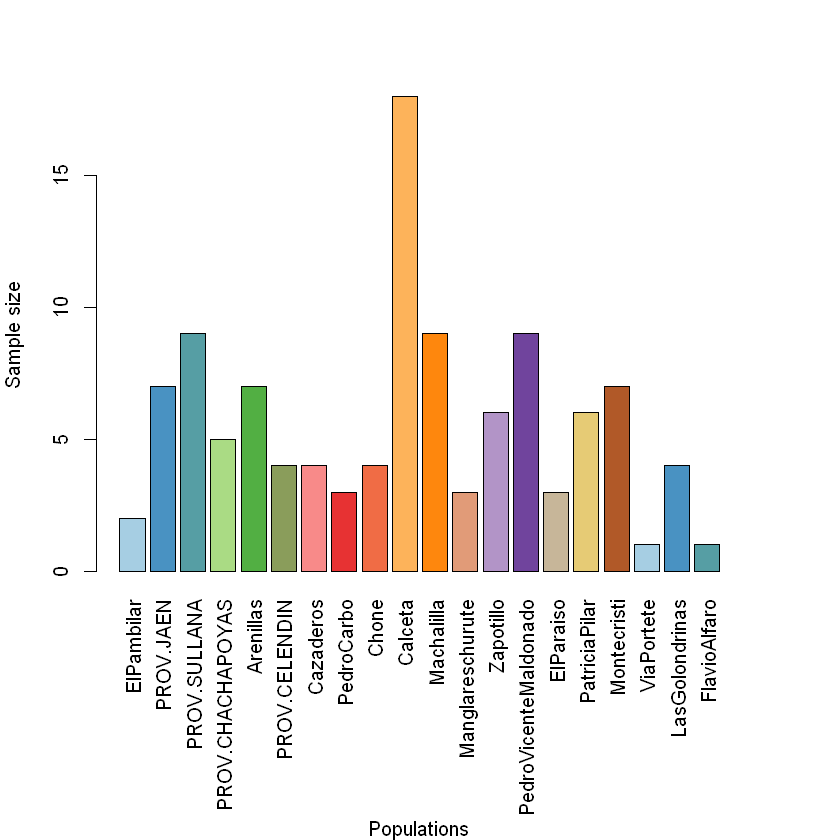

In [8]:
# Check the number of samples per locality (populations)
par(mar=c(11,4,4,4)) # Setting the margins
barplot(table(pop(wren.n5nb.genind)), col=funky(17), 
        las=3,  ylab="Sample size")
mtext(text="Populations",
      side=1, line=10) # Setting the possition, side=1 bottom, line=9 the higher the closer to the lower margin

Heterozygosity is  way of measuring genetic variability. Lower observed heterozygosity than expected is a sign of some force driving this patterns such as inbreeding.

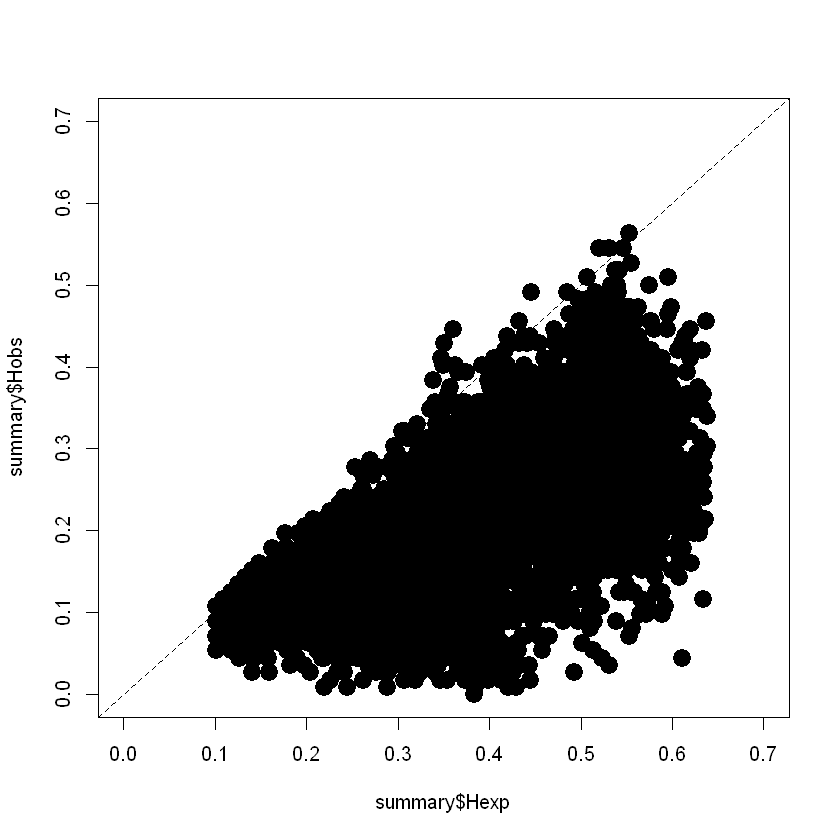

In [16]:
# Plotting the observed vs the expected heterozygosity
plot(summary$Hexp, summary$Hobs, pch=20, cex=3, xlim=c(0,0.7), ylim=c(0,0.7))
abline(0,1,lty=2)

We can visualized how much each population or subpopulation diverge from all populations or metapopulation. One measure we can use for this is the Fst. Fst is the reduction of heterozygosity due to the structure of the metapopulation. Below plot the Fst of each subpopulation or how much this population diverge from others.

In [10]:
## Plotting the Fst per population
install.packages("hierfstat")
library(hierfstat)

Warning message:
"package 'hierfstat' is in use and will not be installed"


In [ ]:
# Estimate the pairwise Fst
wren.n5nb.hier <- genind2hierfstat(wren.n5nb.genind)
wn5nb.pwFst <- pairwise.neifst(wren.n5nb.hier, diploid=TRUE)

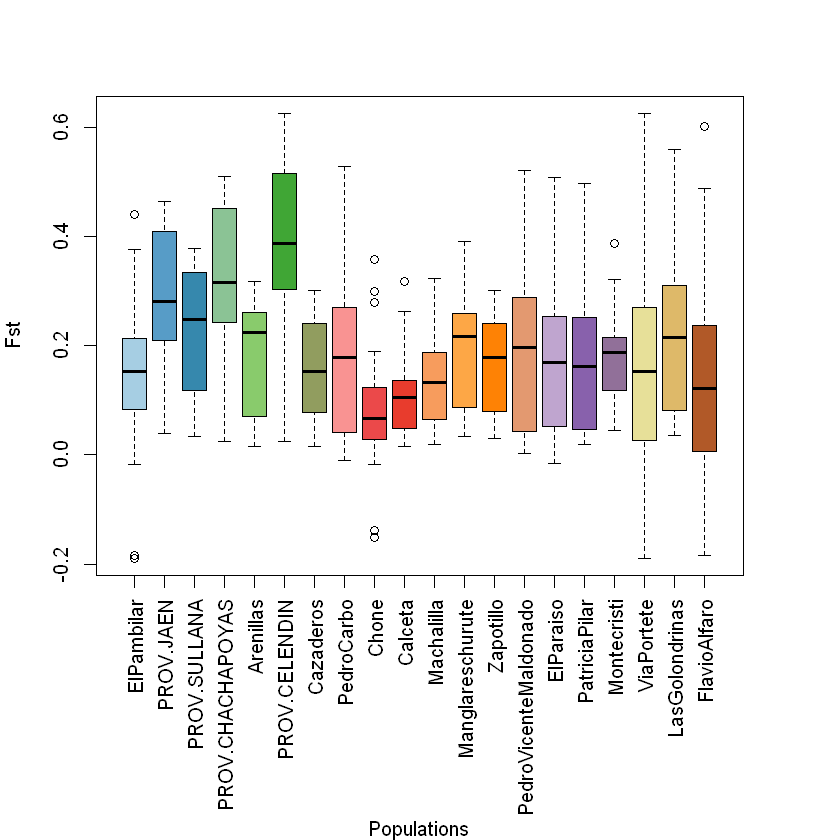

In [16]:
par(mar=c(11,4,4,4)) # Setting the margins
temp <- as.matrix(wn5nb.pwFst)
diag(temp) <- NA
boxplot(temp, col=funky(nPop(wren.n5nb.genind)), las=3, ylab="Fst")
mtext(text="Populations",
      side=1, line=10)

We can also examine if the differences we saw in the barplot above are significant by performing an analisis molecular of variance or AMOVA. 

In [17]:
install.packages("poppr")
library(poppr)

Installing package into 'C:/Users/Owner/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'poppr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Owner\AppData\Local\Temp\RtmpIRtJ60\downloaded_packages


Registered S3 method overwritten by 'pegas':
  method      from
  print.amova ade4

This is poppr version 2.8.7. To get started, type package?poppr
OMP parallel support: available



In [18]:
# Perform a amova among geographic location (populations)
wn5nb.amova <- poppr.amova(wren.n5nb.genind, hier=~Pop, within=FALSE, method="pegas", nperm=100)
wn5nb.amova


 No missing values detected.





	Analysis of Molecular Variance

Call: pegas::amova(formula = hier, data = hierdf, nperm = nperm, is.squared = FALSE)

            SSD       MSD  df
Pop    48900.71 2573.7215  19
Error  81362.71  884.3773  92
Total 130263.42 1173.5443 111

Variance components:
      sigma2 P.value
Pop   308.95       0
Error 884.38        

Phi-statistics:
Pop.in.GLOBAL 
     0.258897 

Variance coefficients:
       a 
5.468045 
